<h1 style="color:orange">EXERCISE CLASS 5 - Principal Component Analysis (PCA) </h1>



# EXERCISE 1

A pencil producer performs a process control by using 3 quality characteristics. 
1. Pencil diameter
2. Ultimate tensile strength
3. The ease of sliding on paper (glide)

Perform a Principal Component Analysis for these data.

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the dataset
data = pd.read_csv('ESE05_ex1.csv')

# Print the first 5 rows of the dataset
data.head()

,Diameter,Tensile str,Glide
0,0.273367,0.091167,0.064700
1,-0.526633,-0.125500,-0.548633
2,0.240033,0.244500,0.281367
3,-0.259967,-0.018833,0.408033
4,-0.093300,-0.078833,-0.265300


> Reminder:
> - Dataset $X$ is a $n \times p$ matrix, where $n$ is the number of observations, and $p$ is the number of variables.
> - The sample variance-covariance matrix $S$ is a $p \times p$ matrix.
> - The sample correlation matrix $R$ is a $p \times p$ matrix.
>
> Eigendecomposition of $S$:
> - Eigenvalues is a $p \times 1$ vector, $\lambda_1, \lambda_2, \dots, \lambda_p$ (explained variance).
> - Eigenvectors is a $p \times p$ matrix, $\mathbf{u_1}, \mathbf{u_2}, \dots, \mathbf{u_p}$ (loadings).
> $$ \mathbf{u_1} = [u_{11}, u_{12}, \dots, u_{1p}]^T$$
> $$ \mathbf{u_2} = [u_{21}, u_{22}, \dots, u_{2p}]^T$$
> $$ \vdots$$
> $$ \mathbf{u_p} = [u_{p1}, u_{p2}, \dots, u_{pp}]^T$$
> - Projection of data onto the space spanned by the PCs (scores) ($n \times p$ matrix):
> $$ \mathbf{z_1} = [z_{11}, z_{21}, \dots, z_{n1}]^T = ( \mathbf{X} - \bar{ \mathbf{X}}) \mathbf{u_1}$$
> $$ \mathbf{z_2} = [z_{12}, z_{22}, \dots, z_{n2}]^T = ( \mathbf{X} - \bar{ \mathbf{X}}) \mathbf{u_2}$$
> $$ \vdots$$
> $$ \mathbf{z_p} = [z_{1p}, z_{2p}, \dots, z_{np}]^T = ( \mathbf{X} - \bar{ \mathbf{X}}) \mathbf{u_p}$$

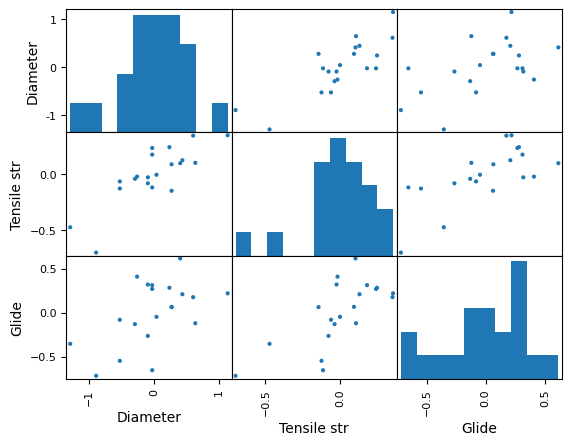

In [2]:
# Create a correlation plot of the dataset
pd.plotting.scatter_matrix(data, alpha = 1)
plt.show()

> We can also compute the variance covariance matrix. 

In [3]:
# Create the variance covariance matrix using pandas
cov_matrix = data.cov()
print(cov_matrix)

             Diameter  Tensile str     Glide
Diameter     0.307556     0.114273  0.109546
Tensile str  0.114273     0.063803  0.064642
Glide        0.109546     0.064642  0.131978


> Now we can perform the principal component analysis.

In [4]:
# import the libraries for PCA
from sklearn.decomposition import PCA

# Create the PCA object
pca = PCA()
# Fit the PCA object to the data
pca.fit(data)
# Print the eigenvalues
print("Eigenvalues \n", pca.explained_variance_)
# Print the eigenvectors 
print("\nEigenvectors \n", pca.components_)
# Print the explained variance ratio
print("\nExplained variance ratio \n", pca.explained_variance_ratio_)
# Print the cumulative explained variance ratio
print("\nCumulative explained variance ratio \n", np.cumsum(pca.explained_variance_ratio_))


Eigenvalues 
 [0.40977919 0.08038204 0.01317523]

Eigenvectors 
 [[-0.83887956 -0.35428255 -0.41323717]
 [ 0.47686144 -0.11227839 -0.87177791]
 [ 0.26245809 -0.92837355  0.26313173]]

Explained variance ratio 
 [0.81412578 0.15969842 0.02617579]

Cumulative explained variance ratio 
 [0.81412578 0.97382421 1.        ]


> If we retain the first two PCs we can explain about 97% of observed variability. 

> Projection of data onto the space spanned by the PCs (scores) ($n \times p$ matrix):
> $$ \mathbf{z_1} = [z_{11}, z_{21}, \dots, z_{n1}]^T = ( \mathbf{X} - \bar{ \mathbf{X}}) \mathbf{u_1}$$
> $$ \mathbf{z_2} = [z_{12}, z_{22}, \dots, z_{n2}]^T = ( \mathbf{X} - \bar{ \mathbf{X}}) \mathbf{u_2}$$
> $$ \vdots$$
> $$ \mathbf{z_p} = [z_{1p}, z_{2p}, \dots, z_{np}]^T = ( \mathbf{X} - \bar{ \mathbf{X}}) \mathbf{u_p}$$

> For example, the first score (z1 projection of all data on 1 st PC):
> $$ \mathbf{z_1} = -0.8388 (\mathbf{X_1} - \mathbf{\bar{x}_1}) - 0.354283 (\mathbf{X_2} - \mathbf{\bar{x}_2}) - 0.413237 (\mathbf{X_3} - \mathbf{\bar{x}_3})$$
> In this case, $\mathbf{\bar{x}} = [0, 0, 0]^T$.

In [5]:
# Compute the scores (i.e. all the principal components, n x 3) 
scores = pca.transform(data)
# create a dataframe with the scores
scores_df = pd.DataFrame(scores, columns = ['z1', 'z2', 'z3'])
# Print the first rows of the scores dataframe
scores_df.head()

,z1,z2,z3
0,-0.288315,0.063731,0.004118
1,0.713002,0.241259,-0.166089
2,-0.404211,-0.158266,-0.089970
3,0.056180,-0.477555,0.056603
4,0.215870,0.195656,-0.021127


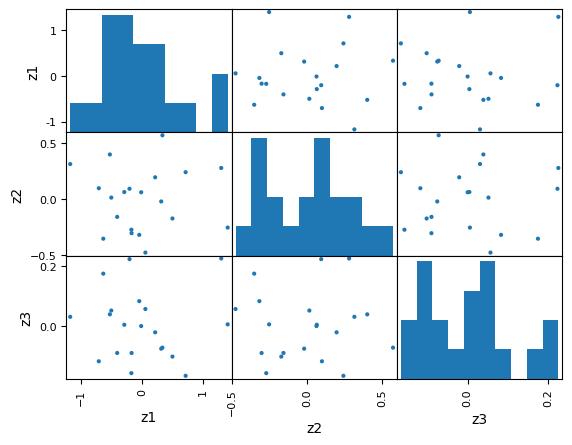

In [6]:
# Plot the scores in a scatter plot
pd.plotting.scatter_matrix(scores_df, alpha = 1)
plt.show()

> Now we can plot the loadings $\mathbf{u_1}$, $\mathbf{u_2}$, $\mathbf{u_3}$.

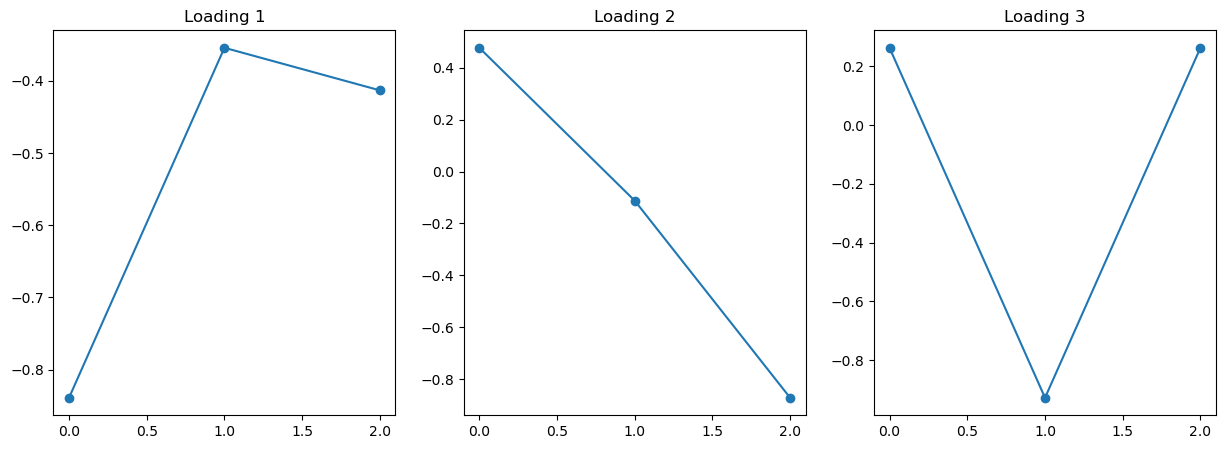

In [7]:
# Plot the loadings
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(pca.components_[0], 'o-')
ax[0].set_title('Loading 1')
ax[1].plot(pca.components_[1], 'o-')
ax[1].set_title('Loading 2')
ax[2].plot(pca.components_[2], 'o-')
ax[2].set_title('Loading 3')
plt.show()


# Exercise 1.1

By using the data of Exercise 1: 
1. Compute the sample correlation matrix.
2. Compute the sample variance covariance matrix of standardised variables and compare the result with the result of point 1. 
3. Apply the PCA by using the correlation matrix and compare the results with the ones obtained applying the PCA to the variance covariance matrix. 

## Point 1

Compute the sample correlation matrix.

> ### Solution

In [8]:
# Compute the correlation matrix of the scores
corr_matrix = data.corr()
print(corr_matrix)

             Diameter  Tensile str     Glide
Diameter     1.000000     0.815757  0.543731
Tensile str  0.815757     1.000000  0.704443
Glide        0.543731     0.704443  1.000000


> Comparison between correlation matrix and variance covariance matrix of input variables.

In [9]:
print(cov_matrix)

             Diameter  Tensile str     Glide
Diameter     0.307556     0.114273  0.109546
Tensile str  0.114273     0.063803  0.064642
Glide        0.109546     0.064642  0.131978


## Point 2

Compute the sample variance covariance matrix of standardised variables and compare the result with the result of point 1. 

> ### Solution
>
> Let's standardise the data.

In [10]:
# Standardize the data by subtracting the mean and dividing by the standard deviation
data_std = (data - data.mean()) / data.std()

data_std.describe()

,Diameter,Tensile str,Glide
count,2.000000e+01,2.000000e+01,2.000000e+01
mean,4.857226e-17,-5.551115e-18,1.110223e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.332108e+00,-2.766650e+00,-1.978228e+00
25%,-4.838523e-01,-3.483881e-01,-4.551025e-01
50%,-4.808470e-02,-4.156903e-02,1.734161e-01
75%,5.529741e-01,5.555734e-01,7.468820e-01
max,2.055621e+00,1.390253e+00,1.691954e+00


> Compute the variance covariance matrix of standardised variables.

In [11]:
cov_matrix_std = data_std.cov()
print(cov_matrix_std)

             Diameter  Tensile str     Glide
Diameter     1.000000     0.815757  0.543731
Tensile str  0.815757     1.000000  0.704443
Glide        0.543731     0.704443  1.000000


> Now compare it with the original correlation matrix.

In [12]:
print(corr_matrix)

             Diameter  Tensile str     Glide
Diameter     1.000000     0.815757  0.543731
Tensile str  0.815757     1.000000  0.704443
Glide        0.543731     0.704443  1.000000


> The sample correlation matrix coincides with the sample variance covariance matrix of standardized variables!

## Point 3
Apply the PCA by using the correlation matrix and compare the results with the ones obtained applying the PCA to the variance covariance matrix. 

> ### Solution
> 
> Apply the PCA on the correlation matrix of the original data.

In [13]:
# Apply the PCA on the correlation matrix instead of the covariance matrix
pca_corr = PCA()
pca_corr.fit(data_std) 
# Compare the eigenvalues
print("Eigenvalues from ORIGINAL data \n", pca.explained_variance_)
print("Eigenvalues from STANDARDIZED data \n", pca_corr.explained_variance_)
# Compare the eigenvectors
print("\nEigenvectors from ORIGINAL data \n", pca.components_)
print("Eigenvectors from STANDARDIZED data \n", pca_corr.components_)
# Compare the explained variance ratio
print("\nExplained variance ratio from ORIGINAL data \n", pca.explained_variance_ratio_)
print("Explained variance ratio from STANDARDIZED data \n", pca_corr.explained_variance_ratio_)
# Compare the cumulative explained variance ratio
print("\nCumulative explained variance ratio from ORIGINAL data \n", np.cumsum(pca.explained_variance_ratio_))
print("Cumulative explained variance ratio from STANDARDIZED data \n", np.cumsum(pca_corr.explained_variance_ratio_))

Eigenvalues from ORIGINAL data 
 [0.40977919 0.08038204 0.01317523]
Eigenvalues from STANDARDIZED data 
 [2.38187043 0.4677083  0.15042127]

Eigenvectors from ORIGINAL data 
 [[-0.83887956 -0.35428255 -0.41323717]
 [ 0.47686144 -0.11227839 -0.87177791]
 [ 0.26245809 -0.92837355  0.26313173]]
Eigenvectors from STANDARDIZED data 
 [[-0.57522581 -0.61469323 -0.53969204]
 [ 0.59207613  0.14236427 -0.79320758]
 [ 0.5644122  -0.77581225  0.28205359]]

Explained variance ratio from ORIGINAL data 
 [0.81412578 0.15969842 0.02617579]
Explained variance ratio from STANDARDIZED data 
 [0.79395681 0.15590277 0.05014042]

Cumulative explained variance ratio from ORIGINAL data 
 [0.81412578 0.97382421 1.        ]
Cumulative explained variance ratio from STANDARDIZED data 
 [0.79395681 0.94985958 1.        ]


> **Different PCs**
>
> The eigenvalues and eigenvectors of the correlation matrix have no simple relationship with those of the corresponding covariance matrix. 
>
> The PCs for correlation and covariance matrices do not, therefore, give equivalent information, nor can they be derived directly from each other. 

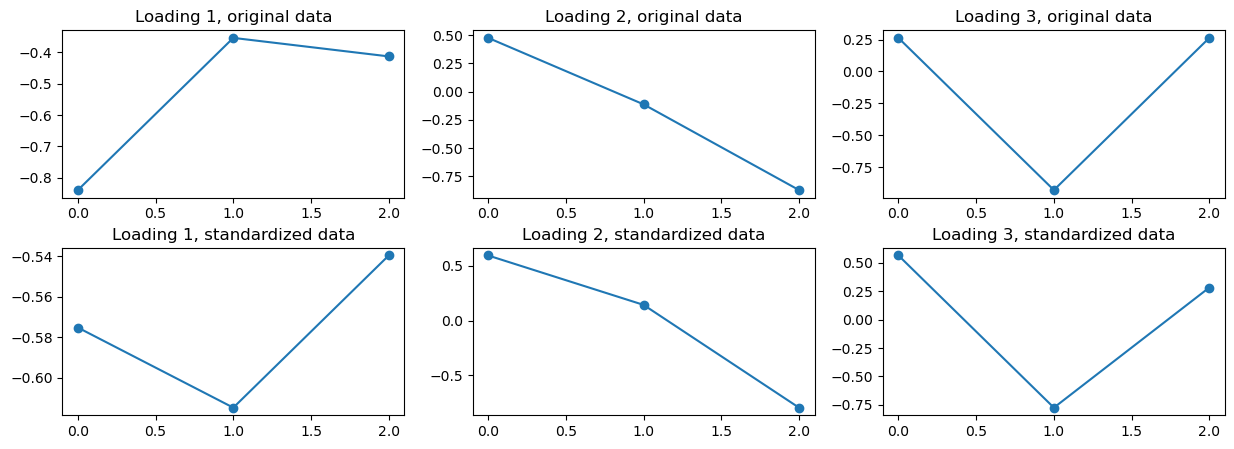

In [14]:
# Plot the loadings of original and standardized data
fig, ax = plt.subplots(2, 3, figsize = (15, 5))
ax[0, 0].plot(pca.components_[0], 'o-')
ax[0, 0].set_title('Loading 1, original data')
ax[0, 1].plot(pca.components_[1], 'o-')
ax[0, 1].set_title('Loading 2, original data')
ax[0, 2].plot(pca.components_[2], 'o-')
ax[0, 2].set_title('Loading 3, original data') 
ax[1, 0].plot(pca_corr.components_[0], 'o-')
ax[1, 0].set_title('Loading 1, standardized data')
ax[1, 1].plot(pca_corr.components_[1], 'o-')
ax[1, 1].set_title('Loading 2, standardized data')
ax[1, 2].plot(pca_corr.components_[2], 'o-')
ax[1, 2].set_title('Loading 3, standardized data')
fig.subplots_adjust(hspace = 0.3)
plt.show()

> Note how the value of the first loading $u_{11}$ was the one with the largest variance when we applied the PCA to the original (non standardised) data.

> A few considerations: 
> - If the input variables are on different scales/units, PCA on standardized data should be applied to avoid undesired effects, i.e., scale effects, on individual variances.
> - If there are large differences between the variances of the elements of $\mathbf{X}$, then those variables whose variances are largest will tend to dominate the first few PCs. 
> - If the input variables are in the same scale with similar variance, both PCA on original and standardized data may be applied, but they will yield different results. 

# EXERCISE 2.1

In a chemical process, three variables of interest are measured and monitored. The three variables are correlated to each other, and quality engineers would like to explore the possibility to reduce the dimensionality of the problem via PCA.
1. How many PCs are needed to capture at least 90% of variability (use the correlation matrix).
2. Compute the data reconstruction by using the first two PCs. 
3. Verify that using all the three PCs, the reconstructed data coincide with the original data. 

In [15]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the dataset
data = pd.read_csv('ESE05_ex2.csv')

# Print the first 5 rows of the dataset
data.head()

,Ph1,Ph2,Ph3
0,0.801765,1.224439,0.460368
1,1.529265,2.354552,0.512780
2,-0.767775,0.185170,-0.669498
3,0.983894,1.103092,0.237085
4,0.678907,1.879489,0.279479


## Point 1

How many PCs are needed to capture at least 90% of variability (use the correlation matrix).

> ### Solution
>
> Let's plot the data.

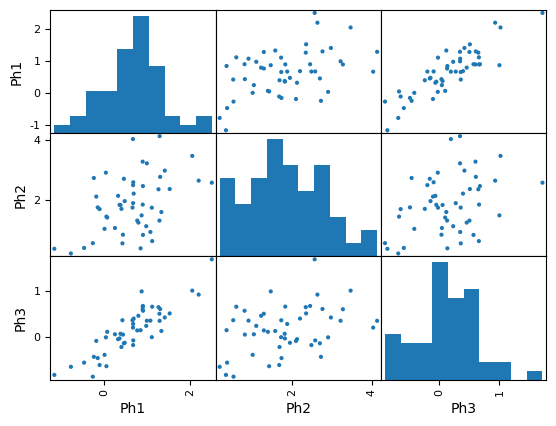

In [16]:
# Create a correlation plot of the dataset
pd.plotting.scatter_matrix(data, alpha = 1)
plt.show()

> If we want to apply the PCA on the correlation matrix, we need to standardize the data first.

In [17]:
# Standardize the data by subtracting the mean and dividing by the standard deviation
data_std = (data - data.mean()) / data.std()

data_std.describe()

,Ph1,Ph2,Ph3
count,5.000000e+01,5.000000e+01,5.000000e+01
mean,-2.042810e-16,1.820766e-16,-4.884981e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.557023e+00,-1.719188e+00,-2.016354e+00
25%,-5.426323e-01,-7.366496e-01,-5.505967e-01
50%,3.022747e-02,-7.030451e-02,-3.836797e-02
75%,5.655968e-01,7.291376e-01,6.458239e-01
max,2.609332e+00,2.374717e+00,2.989271e+00


> Let's compute the covariance matrix on the standardized data. 

In [18]:
cov_matrix_std = data_std.cov()
print(cov_matrix_std)

          Ph1       Ph2       Ph3
Ph1  1.000000  0.451571  0.872272
Ph2  0.451571  1.000000  0.366454
Ph3  0.872272  0.366454  1.000000


> Now compare it with the correlation matrix computed on the original data.

In [19]:
corr_matrix = data.corr()
print(corr_matrix)

          Ph1       Ph2       Ph3
Ph1  1.000000  0.451571  0.872272
Ph2  0.451571  1.000000  0.366454
Ph3  0.872272  0.366454  1.000000


> The two matrices are the same.
>
> Now perform the PCA on the standardized data.

In [20]:
# import the libraries for PCA
from sklearn.decomposition import PCA

# Create the PCA object
pca_std = PCA()
# Fit the PCA object to the data
pca_std.fit(data_std)
# Print the eigenvalues
print("Eigenvalues \n", pca_std.explained_variance_)
# Print the eigenvectors
print("\nEigenvectors \n", pca_std.components_)
# Print the explained variance ratio
print("\nExplained variance ratio \n", pca_std.explained_variance_ratio_)
# Print the cumulative explained variance ratio
print("\nCumulative explained variance ratio \n", np.cumsum(pca_std.explained_variance_ratio_))


Eigenvalues 
 [2.16092041 0.7166299  0.12244969]

Eigenvectors 
 [[ 0.64199397  0.44647182  0.62330302]
 [-0.25082525  0.89052683 -0.37953744]
 [-0.72452083  0.08732061  0.68369926]]

Explained variance ratio 
 [0.7203068  0.23887663 0.04081656]

Cumulative explained variance ratio 
 [0.7203068  0.95918344 1.        ]


> To capture at least 90% of variability, we need at least two PCs.

> Plot the scree plot to compare the eigenvalues.

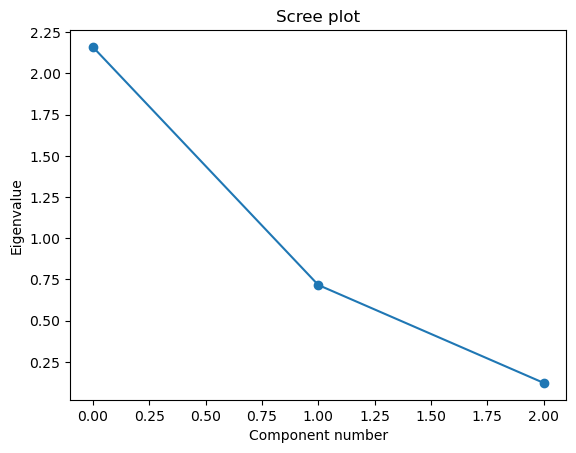

In [21]:
# Plot the eigenvalues (scree plot)
plt.plot(pca_std.explained_variance_, 'o-')
plt.xlabel('Component number')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.show()

> Plot the cumulated explained variance.

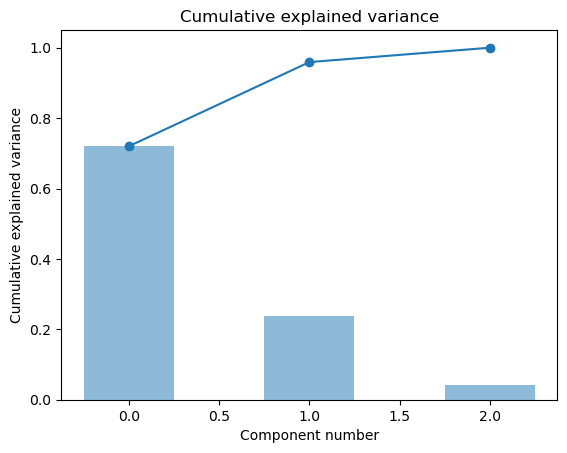

In [22]:
# Plot the cumulative explained variance
plt.plot(np.cumsum(pca_std.explained_variance_ratio_), 'o-')
# add a bar chart to the plot
plt.bar(range(0, len(pca_std.explained_variance_ratio_)), pca_std.explained_variance_ratio_, width = 0.5, alpha=0.5, align='center')
plt.xlabel('Component number')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance')
plt.show()

> Now plot the loadings. 

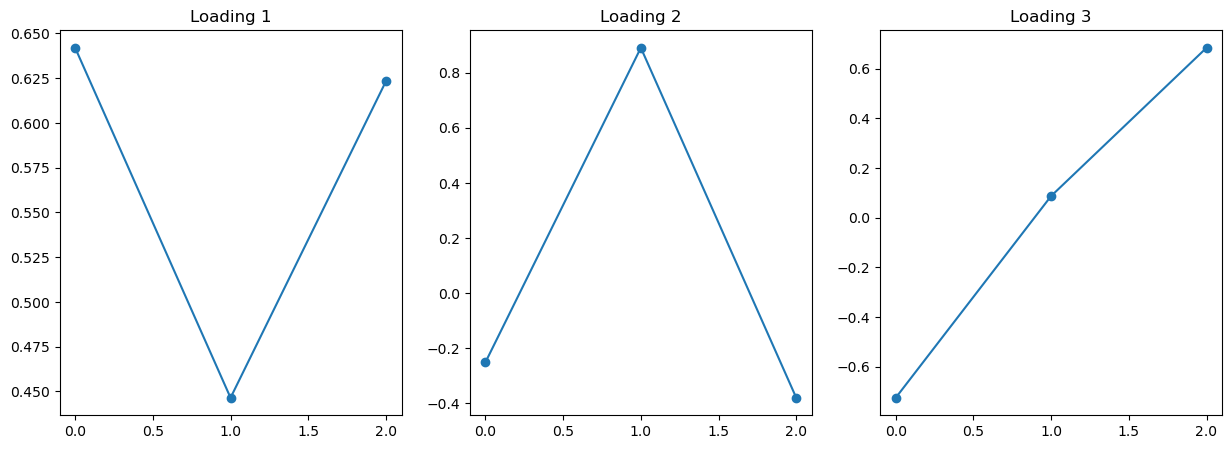

In [23]:
# Plot the loadings
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(pca_std.components_[0], 'o-')
ax[0].set_title('Loading 1')
ax[1].plot(pca_std.components_[1], 'o-')
ax[1].set_title('Loading 2')
ax[2].plot(pca_std.components_[2], 'o-')
ax[2].set_title('Loading 3')
plt.show()

> Now compute the scores and plot the scatterplot of the scores along the first two PCs.

In [24]:
# Compute the scores
scores = pca_std.transform(data_std)
# create a dataframe with the scores
scores_df = pd.DataFrame(scores, columns = ['z1', 'z2', 'z3'])
# Print the first rows of the scores dataframe
scores_df.head()

,z1,z2,z3
0,0.204177,-0.842842,0.195432
1,1.449036,-0.095903,-0.377142
2,-3.055249,-0.420149,0.218142
3,0.044956,-0.856034,-0.295842
4,0.178707,-0.062674,0.142082


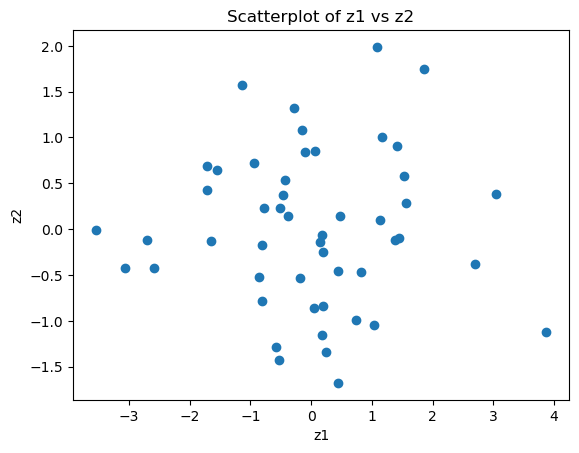

In [25]:
# Create a scatterplot with the first two scores
plt.scatter(scores_df['z1'], scores_df['z2'])
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('Scatterplot of z1 vs z2')
plt.show()

## Point 2

Compute the data reconstruction by using the first two PCs. 

> ### Solution
> 
> Data reconstruction based on the first $K=2$ PCs. 
> $$\mathbf{\hat{x}}_j^*(K) = z_{j1}\mathbf{u_1} + z_{j2}\mathbf{u_2}$$
> for $j=1,\ldots,n$.
>
> Remind that we are using the standardized data $\mathbf{\hat{x}}_j^*$. If we want to reconstruct the original data $\mathbf{\hat{x}}_j$, we need to multiply the reconstructed data by the standard deviation and add the mean.
> $$\mathbf{\hat{x}}_j(K) = \mathbf{\hat{x}}_j^* s_i + \bar{x}_i$$

In [26]:
# First let's save in an array the mean and standard deviation of the original data
mean = data.mean()
std = data.std()

# Compute the reconstructed data_std using the first two principal components
reconstructed_data_std = scores_df[['z1', 'z2']].dot(pca_std.components_[0:2, :])
# Now use the mean and standard deviation to compute the reconstructed data
reconstructed_data = reconstructed_data_std.dot(np.diag(std)) + np.asarray(mean)

# Compare the original data with the reconstructed data
print("Original data\n", data.head())
print("\nReconstructed (ORIGINAL) data\n", reconstructed_data.head())



Original data
         Ph1       Ph2       Ph3
0  0.801765  1.224439  0.460368
1  1.529265  2.354552  0.512780
2 -0.767775  0.185170 -0.669498
3  0.983894  1.103092  0.237085
4  0.678907  1.879489  0.279479

Reconstructed (ORIGINAL) data
           0         1         2
0  0.902098  1.207970  0.391005
1  1.335644  2.386335  0.646636
2 -0.655783  0.166786 -0.746921
3  0.832011  1.128023  0.342085
4  0.751850  1.867516  0.229052


> The reconstructed data are different from the original data.

## Point 3

Verify that using all the three PCs, the reconstructed data coincide with the original data.

> ### Solution
>
> Data reconstruction based on all the PCs ($K=3$).

In [27]:
# Compute the reconstructed data_std using the first two principal components
reconstructed_data_std_3 = scores_df.dot(pca_std.components_)
# Now use the mean and standard deviation to compute the reconstructed data
reconstructed_data_3 = reconstructed_data_std_3.dot(np.diag(std)) + np.asarray(mean)

# Compare the original data with the reconstructed data
print("Original data\n", data.head())
print("Reconstructed (ORIGINAL) data\n", reconstructed_data_3.head())



Original data
         Ph1       Ph2       Ph3
0  0.801765  1.224439  0.460368
1  1.529265  2.354552  0.512780
2 -0.767775  0.185170 -0.669498
3  0.983894  1.103092  0.237085
4  0.678907  1.879489  0.279479
Reconstructed (ORIGINAL) data
           0         1         2
0  0.801765  1.224439  0.460368
1  1.529265  2.354552  0.512780
2 -0.767775  0.185170 -0.669498
3  0.983894  1.103092  0.237085
4  0.678907  1.879489  0.279479


> The reconstructed data coincide with the original data.

# EXERCISE 2.2

Using the data of Exercise 2, estimate the scores for all the observations by projecting the input variables onto the space spanned by the first 2 PCs estimated on the first m = 40 data.

In [28]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the dataset
data = pd.read_csv('ESE05_ex2.csv')

# Print the first 5 rows of the dataset
data.head()

,Ph1,Ph2,Ph3
0,0.801765,1.224439,0.460368
1,1.529265,2.354552,0.512780
2,-0.767775,0.185170,-0.669498
3,0.983894,1.103092,0.237085
4,0.678907,1.879489,0.279479


In [29]:
# Extract a subset of the data with only the first 40 rows
data40 = data.iloc[:40, :]

# Print the size of the new dataset
print(data40.describe())

             Ph1        Ph2        Ph3
count  40.000000  40.000000  40.000000
mean    0.670381   1.893018   0.197875
std     0.776173   0.944301   0.557657
min    -1.152475   0.185170  -0.887846
25%     0.071758   1.275474  -0.088188
50%     0.733344   1.824113   0.314454
75%     1.127810   2.596343   0.527662
max     2.508370   4.136243   1.710663


In [30]:
# Standardize the data by subtracting the mean and dividing by the standard deviation
data40_std = (data40 - data40.mean()) / data40.std()

data40_std.describe()

,Ph1,Ph2,Ph3
count,4.000000e+01,4.000000e+01,4.000000e+01
mean,-2.164935e-16,-3.497203e-16,5.551115e-18
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.348518e+00,-1.808585e+00,-1.946935e+00
25%,-7.712494e-01,-6.539699e-01,-5.129733e-01
50%,8.112069e-02,-7.296887e-02,2.090500e-01
75%,5.893392e-01,7.448102e-01,5.913797e-01
max,2.368016e+00,2.375541e+00,2.712758e+00


In [31]:
# import the libraries for PCA
from sklearn.decomposition import PCA

# Create the PCA object
pca_std = PCA()
# Fit the PCA object to the data
pca_std.fit(data40_std)
# Print the eigenvalues
print("Eigenvalues \n", pca_std.explained_variance_)
# Print the eigenvectors
print("\nEigenvectors \n", pca_std.components_)
# Print the explained variance ratio
print("\nExplained variance ratio \n", pca_std.explained_variance_ratio_)
# Print the cumulative explained variance ratio
print("\nCumulative explained variance ratio \n", np.cumsum(pca_std.explained_variance_ratio_))


Eigenvalues 
 [2.26040708 0.63278177 0.10681116]

Eigenvectors 
 [[ 0.63109812  0.47862724  0.6104352 ]
 [-0.25959246  0.87188528 -0.41524428]
 [ 0.73097669 -0.10359551 -0.67449318]]

Explained variance ratio 
 [0.75346903 0.21092726 0.03560372]

Cumulative explained variance ratio 
 [0.75346903 0.96439628 1.        ]


> Plot the scree plot to compare the eigenvalues.

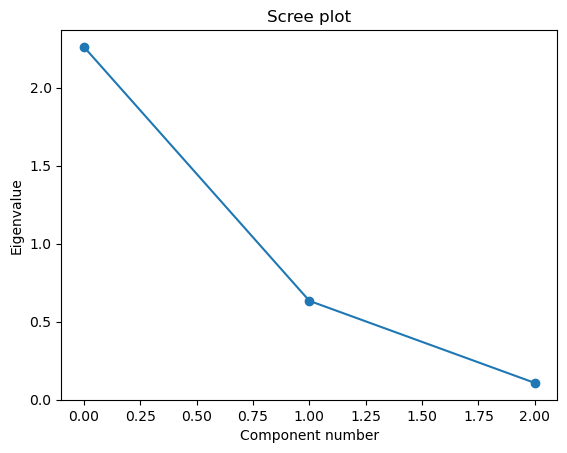

In [32]:
# Plot the eigenvalues (scree plot)
plt.plot(pca_std.explained_variance_, 'o-')
plt.xlabel('Component number')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.show()

> Now compute the scores for all the observations by projecting the input variables onto the space spanned by the first 2 PCs estimated on the first m = 40 data.
>
> In case of PCA on the non-standardized data:
> $$ \mathbf{z_i} = (\mathbf{X} - \bar{\mathbf{x}}) \mathbf{u_i}, \ i = 1,2 $$
>
> In case of PCA on the standardized data:
> $$ \mathbf{z_i} = \mathbf{X}^* \mathbf{u_i}, \ i = 1,2 $$
> where $\mathbf{X}^*$ is the standardized data matrix.


In [33]:
# Standardize the data by subtracting the mean and dividing by the standard deviation
data_std = (data - data40.mean()) / data40.std()

data_std.describe()

,Ph1,Ph2,Ph3
count,50.000000,50.000000,50.000000
mean,-0.014128,-0.051510,-0.069929
std,0.912933,1.022038,0.930891
min,-2.348518,-1.808585,-1.946935
25%,-0.509515,-0.804393,-0.582474
50%,0.013467,-0.123363,-0.105645
75%,0.502223,0.693697,0.531263
max,2.368016,2.375541,2.712758


In [34]:
# Compute the scores
scores = pca_std.transform(data_std)
# create a dataframe with the scores
scores_df = pd.DataFrame(scores, columns = ['z1', 'z2', 'z3'])
# Print the first rows of the scores dataframe
scores_df.head()

,z1,z2,z3
0,0.055288,-0.856707,-0.120407
1,1.276992,-0.095601,0.377358
2,-2.984452,-0.450018,-0.117951
3,-0.102546,-0.863401,0.334493
4,0.089403,-0.076107,-0.089187


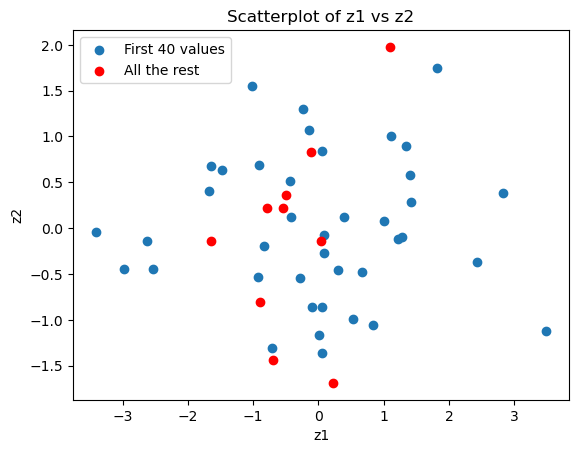

In [35]:
# Create a scatterplot with the first 40 values of the two scores 
plt.scatter(scores_df['z1'][:40], scores_df['z2'][:40], label='First 40 values')
# Add the rest of the values to the scatterplot with a different color
plt.scatter(scores_df['z1'][40:], scores_df['z2'][40:], color='r', label='All the rest')
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('Scatterplot of z1 vs z2')
plt.legend()
plt.show()